In [1]:
import pandas as pd
import matplotlib.pyplot as plt

import tilemapbase
tilemapbase.start_logging()

In [2]:
tilemapbase.init(create=True)

In [3]:
df1 = pd.read_csv('../data/kaiterra/kaiterra_locations.csv', index_col=[0])
df1['Type'] = 'Kaiterra'
df2 = pd.read_csv('../data/govdata/govdata_locations.csv', index_col=[0])
df2['Type'] = 'Govt'

In [4]:
df = pd.merge(df1, df2, how='outer', on=['Monitor ID', 'Latitude', 'Longitude', 'Location', 'Type'], copy=False)

In [5]:
df

,UDID,Latitude,Longitude,Address,Location,Type
Monitor ID,,,,,,
BB4A,492457f434f94afc865bb4701990bb4a,28.554980,77.194430,Jamun,Hauz Khas Village,Kaiterra
91B8,ea3ceeefd9654dfd9aab41422f7391b8,28.503050,77.185660,Vihara,Chhatapur,Kaiterra
BC46,29b8262425cf4135899cd65b2458bc46,28.632950,77.288700,Segel Design,Preet Vihar,Kaiterra
BFDC,11047d2ddc514f63a12ad4f1ad3bbfdc,28.521083,77.214237,Arundhati,Saket,Kaiterra
D804,f083e8afd43e4727a5eb7f3a1529d804,28.558230,77.208620,EPoD,Yusuf Sarai,Kaiterra
...,...,...,...,...,...,...
Sirifort_CPCB,NaN,28.550425,77.215938,NaN,"Sirifort, New Delhi - CPCB",Govt
SoniaVihar_DPCC,NaN,28.710508,77.249485,NaN,"Sonia Vihar, Delhi - DPCC",Govt
SriAurobindoMarg_DPCC,NaN,28.531346,77.190156,NaN,"Sri Aurobindo Marg, Delhi - DPCC",Govt


(28.415079, 28.7500499)
(77.0325413, 77.372281)
28.588432487096775 77.20127194516128


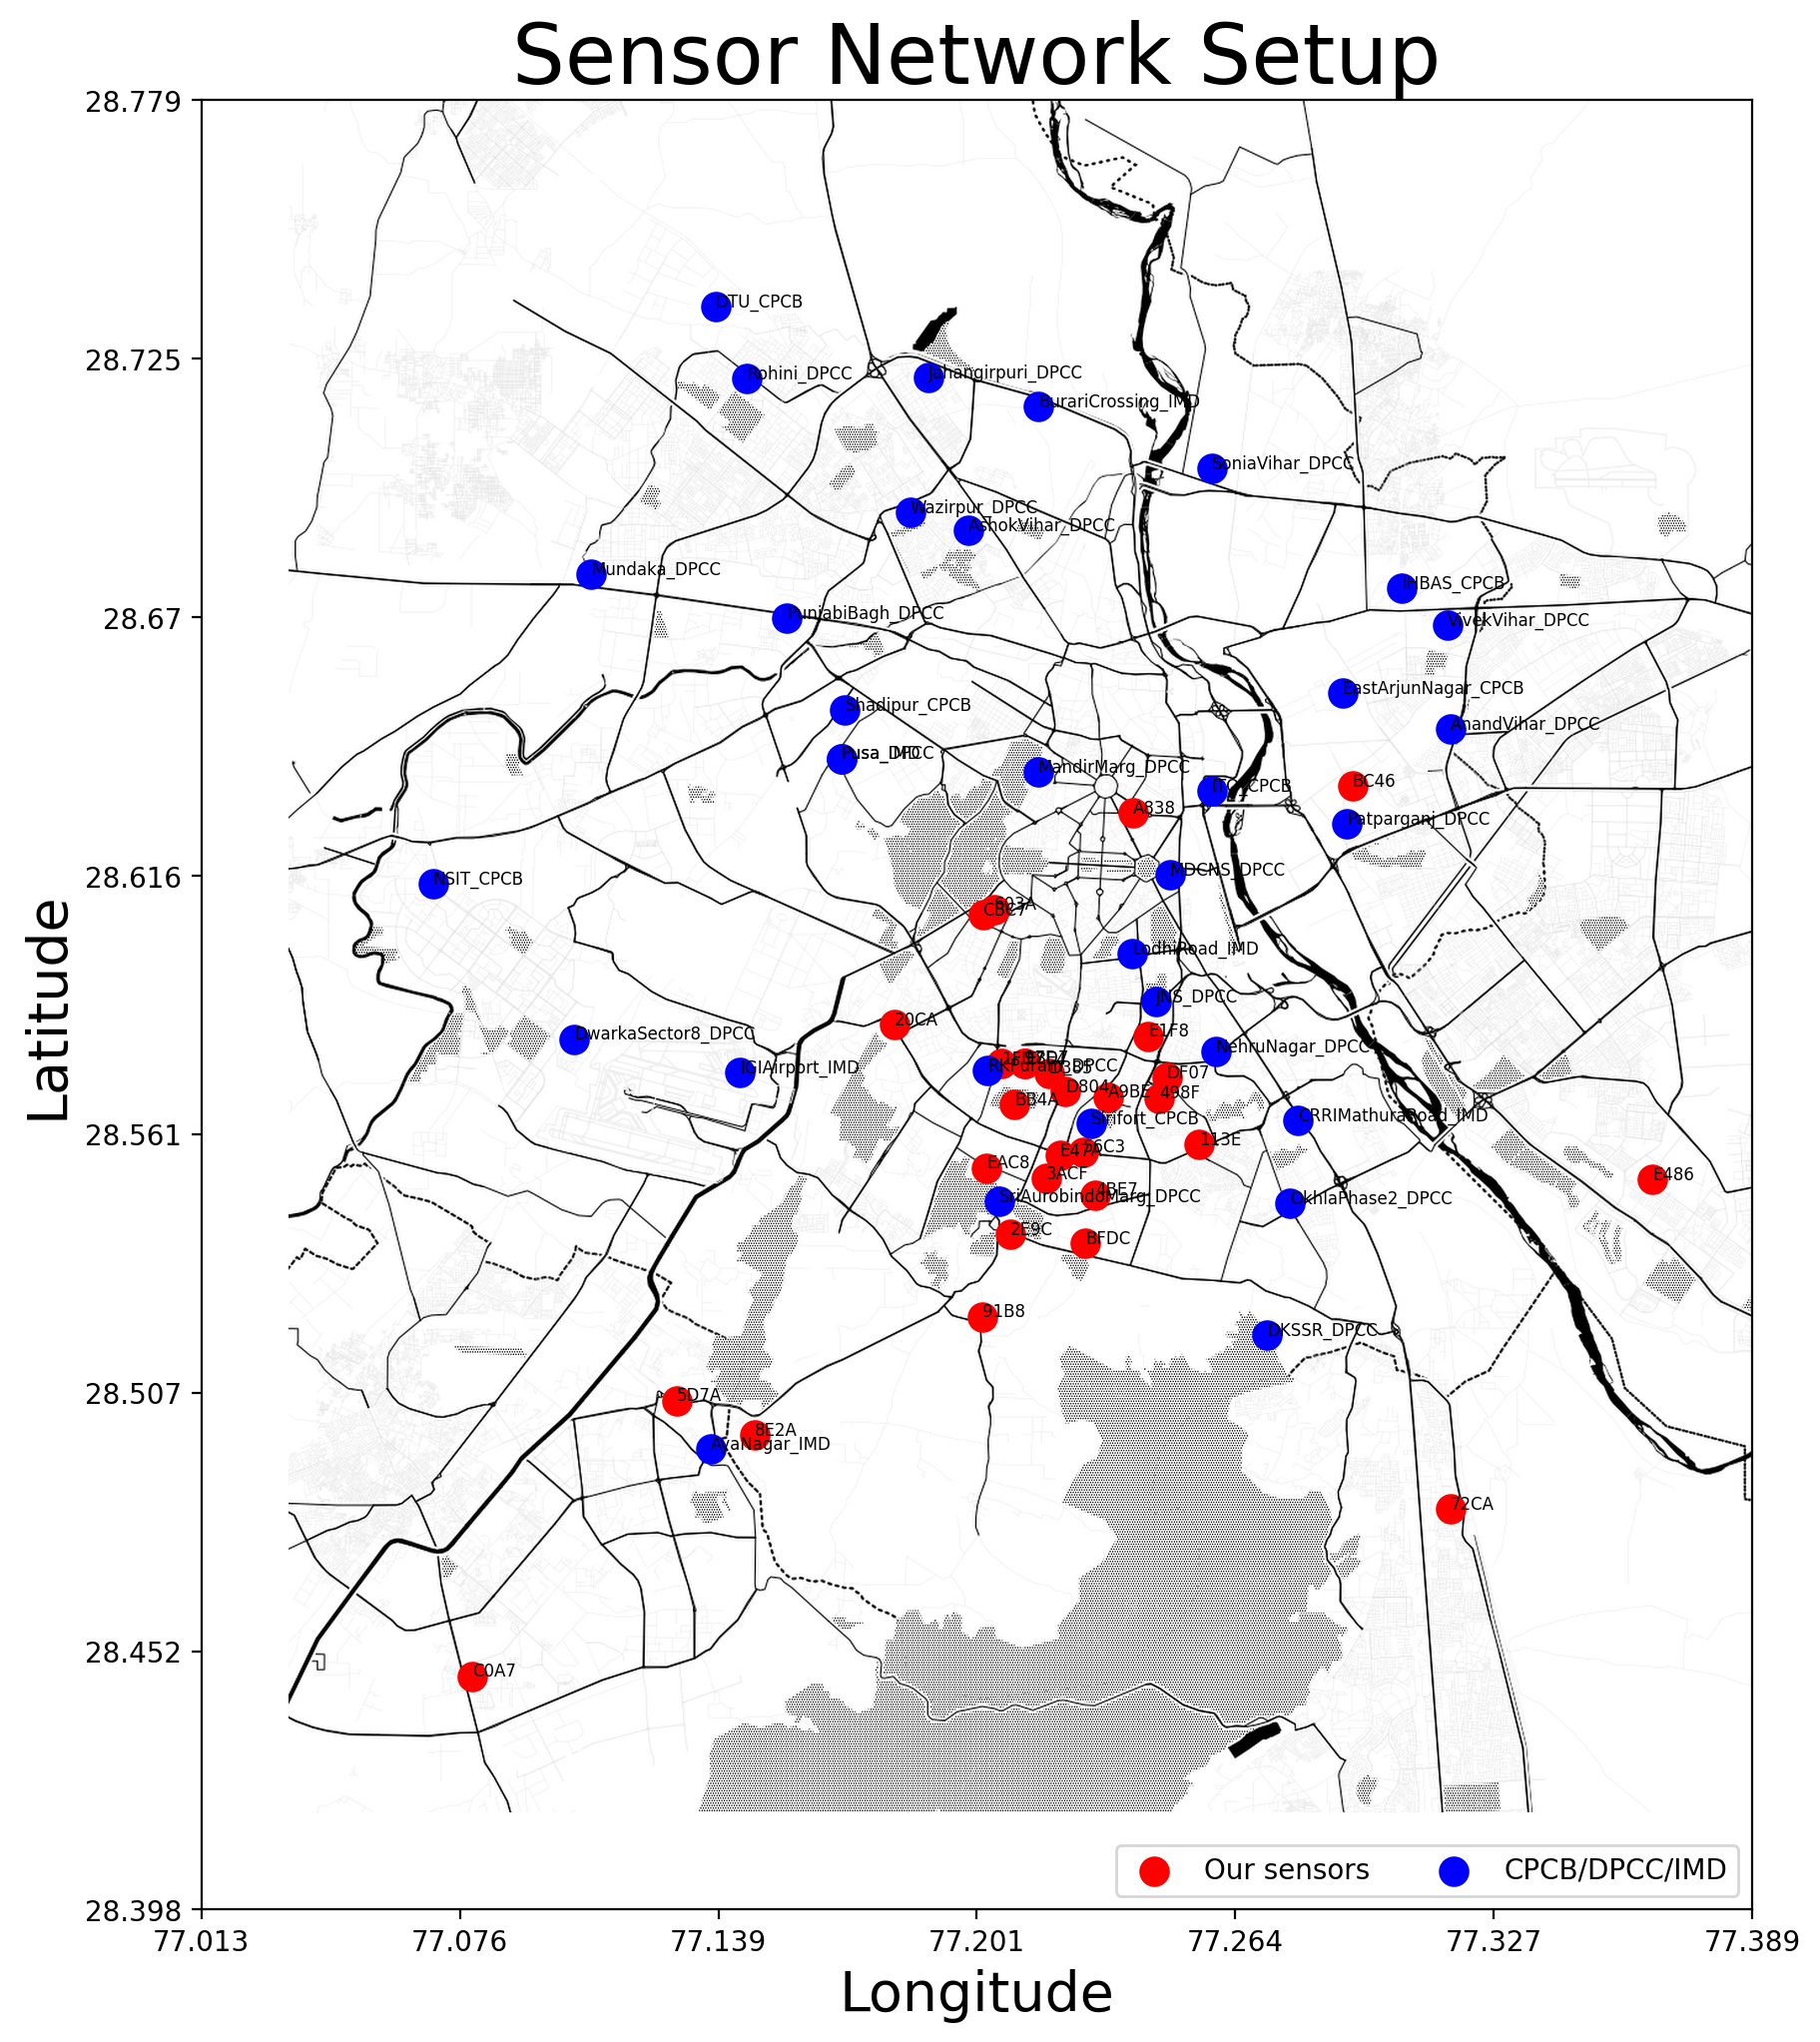

In [35]:
lat_lims = df.Latitude.min(), df.Latitude.max()
lon_lims = df.Longitude.min(), df.Longitude.max()
lon_center, lat_center = df.Longitude.mean(), df.Latitude.mean()

print(lat_lims)
print(lon_lims)
print(lat_center, lon_center)

lat_pad = 1.1 * max(lat_center - lat_lims[0], lat_lims[1] - lat_center)
lon_pad = 1.1 * max(lon_center - lon_lims[0], lon_lims[1] - lon_center)
    
extent = tilemapbase.Extent.from_lonlat(lon_center - lon_pad, 
                                        lon_center + lon_pad, 
                                        lat_center - lat_pad, 
                                        lat_center + lat_pad)
# extent = tilemapbase.Extent.from_lonlat(lon_lims[0], lon_lims[1], lat_lims[0], lat_lims[1])

# extent = extent.to_aspect(1.0)
extent_proj = extent.to_project_3857

# use openstreetmap (OSM)
t = tilemapbase.tiles.Stamen_Toner_Background
# t = tilemapbase.tiles.Stamen_Toner

colordict = {'Kaiterra':'r', 'Govt':'b'}

plt.rc('font', size=10)

fig, ax = plt.subplots(figsize=(12,12), dpi=200)
ax.xaxis.set_visible(True)
ax.yaxis.set_visible(True)

plotter = tilemapbase.Plotter(extent, t, width=600)
plotter.plot(ax, t)

for row in df.itertuples():
    x, y = tilemapbase.project(row.Longitude, row.Latitude)
    if row.Type == 'Kaiterra':
        obj1 = ax.scatter(x, y, marker='.', color='r', s=400, label='Our sensors')
    else:
        obj2 = ax.scatter(x, y, marker='.', color='b', s=400, label='CPCB/DPCC/IMD')
    # ax.text(x, y, row._3[:2], fontsize=12, color='b', withdash=True)
    ax.text(x, y, row.Index, fontsize=6)

ax.legend((obj1, obj2), (obj1.get_label(), obj2.get_label()), loc='lower right', ncol=2)
 
# ax.set(xlim = (lon_center - lon_pad, lon_center + lon_pad), ylim = (lat_center - lat_pad, lat_center + lat_pad))
import numpy as np
plt.xticks(plt.xticks()[0],np.round(np.linspace(lon_center - lon_pad,lon_center + lon_pad, 7),3))
plt.yticks(plt.yticks()[0],np.round(np.linspace(lat_center + lat_pad,lat_center - lat_pad, 8),3))
plt.xlabel('Longitude', fontsize=20)
plt.ylabel('Latitude', fontsize=20)
plt.title('Sensor Network Setup', fontsize=30)
fig.savefig('locs_map.png')
# plt.show()

In [9]:
plt.close()